# Importing necessary library for the statistical analysis

In [1]:
import numpy as np
import pandas as pd
!pip3 install scipy
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import f_oneway
import seaborn as sns

In [2]:
# Results for the bioassay test for blank coil
blank_coil = {'NO-death_mosqs':[0,1,0],
            'No_Knockdown_mosqs':[0,0,1],
            'No_of_flying_mosqs':[19,19,20]}


In [3]:
# Results for the Number of death mosquitoes for Commercial and Bioinsecticide coils
Number_of_death_mosquitoes = {"Commercial":[12,10,11,9,14],
                                    "bioinsecticide":[4,3,2,3,2]}

In [4]:
# Results for the Number of knowndown mosquitoes for Commercial and Bioinsecticide coils
Number_Knockdown_mosquitoes = {"Commercial":[6,3,5,7,4],
                                      "bioinsecticide":[3,2,3,6,4]}

In [5]:
# Results for the Number of mosquitoes still able to fly for Commercial and Bioinsecticide coils
Number_of_mosquitoes_still_able_to_fly = {"Commercial":[2,7,4,1,2],
                                      "bioinsecticide":[13,15,15,11,14]}

# The datas are then presentedd in a form of dataframe using the Pandas library for analyssis 
With the following appreciation representing the words:
"""
    BC= Blank coil,
    NDM = Number of Death Mosquitoes,
    NKM = Number of Kockdown Mosquitoes,
    NLM = Number of  Mosquitoes still able to fly,"""

In [6]:
BC = pd.DataFrame(blank_coil, index = [1,2,3])
print(BC)

   NO-death_mosqs  No_Knockdown_mosqs  No_of_flying_mosqs
1               0                   0                  19
2               1                   0                  19
3               0                   1                  20


In [7]:
NDM = pd.DataFrame(Number_of_death_mosquitoes, index = [1,2,3,4,5])
print(NDM)

   Commercial  bioinsecticide
1          12               4
2          10               3
3          11               2
4           9               3
5          14               2


In [8]:
NDM.columns

Index(['Commercial', 'bioinsecticide'], dtype='object')

In [9]:
NKM = pd.DataFrame(Number_Knockdown_mosquitoes,index = [1,2,3,4,5])
print(NKM)

   Commercial  bioinsecticide
1           6               3
2           3               2
3           5               3
4           7               6
5           4               4


In [10]:
NLM = pd.DataFrame(Number_of_mosquitoes_still_able_to_fly,index = [1,2,3,4,5])
print(NLM)

   Commercial  bioinsecticide
1           2              13
2           7              15
3           4              15
4           1              11
5           2              14


### PERCENTAGE MORTALITY , KNOWNDOWN AND LIVING OF THE MOSQUITOES 
    PDM = Percentage of Death Mosquitoes,
    PKM = Percentage of Kockdown Mosquitoes,
    PLM = Percentage of  Mosquitoes still able to fly,

In [11]:
NDM = pd.DataFrame(Number_of_death_mosquitoes)
PDM= NDM/20*100
PDM

,Commercial,bioinsecticide
0,60.0,20.0
1,50.0,15.0
2,55.0,10.0
3,45.0,15.0
4,70.0,10.0


In [12]:
NKM = pd.DataFrame(Number_Knockdown_mosquitoes)
PKM = NKM/20*100
PKM

,Commercial,bioinsecticide
0,30.0,15.0
1,15.0,10.0
2,25.0,15.0
3,35.0,30.0
4,20.0,20.0


In [13]:
NLM = pd.DataFrame(Number_of_mosquitoes_still_able_to_fly)
PLM= NLM/20*100
PLM

,Commercial,bioinsecticide
0,10.0,65.0
1,35.0,75.0
2,20.0,75.0
3,5.0,55.0
4,10.0,70.0


# Statistical description of the datas

In [14]:
PDM.describe()

,Commercial,bioinsecticide
count,5.000000,5.0000
mean,56.000000,14.0000
std,9.617692,4.1833
min,45.000000,10.0000
25%,50.000000,10.0000
50%,55.000000,15.0000
75%,60.000000,15.0000
max,70.000000,20.0000


In [15]:
PKM.describe()

,Commercial,bioinsecticide
count,5.000000,5.000000
mean,25.000000,18.000000
std,7.905694,7.582875
min,15.000000,10.000000
25%,20.000000,15.000000
50%,25.000000,15.000000
75%,30.000000,20.000000
max,35.000000,30.000000


In [16]:
PLM.describe()

,Commercial,bioinsecticide
count,5.000000,5.0000
mean,16.000000,68.0000
std,11.937336,8.3666
min,5.000000,55.0000
25%,10.000000,65.0000
50%,10.000000,70.0000
75%,20.000000,75.0000
max,35.000000,75.0000


# Comparison test of the commercial and bioinsecticide (ANOVA)
Starting from the data, we wish to test the equality of the two means associated with with the mortality of the mosquitoes when exposed to the commercial and bioinsecticide coils and use the analysis of variance (ANOVA) test. 

In [17]:
from scipy.stats import t
Commercial=[12,10,11,9,14]
bioinsecticide=[4,3,2,3,2]
# Step 1: Calculate the T-score
def calculate_t_score(Commercial, bioinsecticide):
    mean1 = np.mean(Commercial)
    mean2 = np.mean(bioinsecticide)
    std1 = np.std(Commercial, ddof=1) 
    std2 = np.std(bioinsecticide, ddof=1)
    n1 = len(Commercial)
    n2 = len(bioinsecticide)
    t_score = (mean1 - mean2) / np.sqrt((std1**2 / n1) + (std2**2 / n2))
    return t_score

# Step 2: Determine the degrees of freedom (df)
def calculate_degrees_of_freedom(Commercial, bioinsecticide):
    n1 = len(Commercial)
    n2 = len(bioinsecticide)
    degrees_of_freedom_Within_Groups = n1 + n2 - 2 # For a two-sample t-test
    return degrees_of_freedom_Within_Groups

# Step 3: Identify the appropriate t-distribution
# (The scipy.stats.t distribution is used, which automatically considers the degrees of freedom)

# Step 4: Find the p-value
# Perform one-way ANOVA using the F-test
f_value, p_value = stats.f_oneway(Commercial, bioinsecticide)
# Print the results
print("F-value:", f_value)
print("p-value:", p_value)

#find F critical value
F_critical_value = scipy.stats.f.ppf(q=1-0.05, dfn=1, dfd=8)

# Step 5: Interpret the p-value
def interpret_p_value(p_value, alpha=0.05):
    if p_value < alpha:
        return "Reject the null hypothesis. There is a statistically significant difference."
    else:
        return "The result Fail to reject the null hypothesis. There is no statistically significant difference."
    
# statistic calcualtion
t_score = calculate_t_score(Commercial, bioinsecticide)
df = calculate_degrees_of_freedom(Commercial, bioinsecticide)
result = interpret_p_value(p_value)
# Results visualization
print("F critical value:",F_critical_value)
print("degrees_of_freedom_Within_Groups:",df)
print("t_test:",t_score)
print("Result interpretation:", result)

F-value: 80.18181818181822
p-value: 1.923552183170418e-05
F critical value: 5.317655071578714
degrees_of_freedom_Within_Groups: 8
t_test: 8.954430086935636
Result interpretation: Reject the null hypothesis. There is a statistically significant difference.


AxesImage(size=(2, 2))


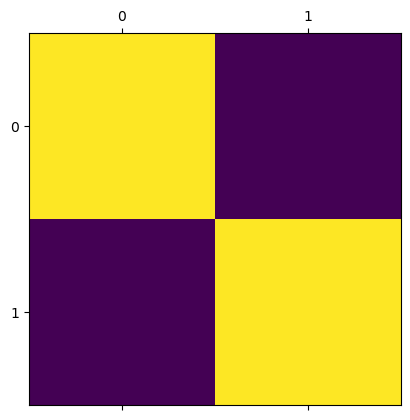

In [18]:
print(plt.matshow(PDM.corr()))
plt.show()

Text(0.5, 1.0, 'Mosquitoes mortality')

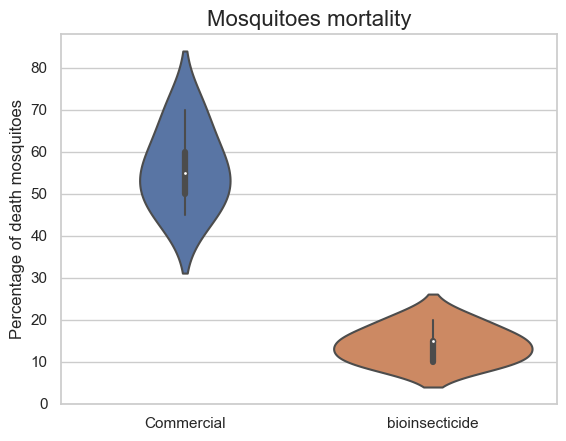

In [19]:
sns.set(style = 'whitegrid')   
sns.violinplot(Y="Percentage of death mosquitoes", 
             data = PDM)
plt.ylabel('Percentage of death mosquitoes', size= 12)
plt.title('Mosquitoes mortality',size= 16)

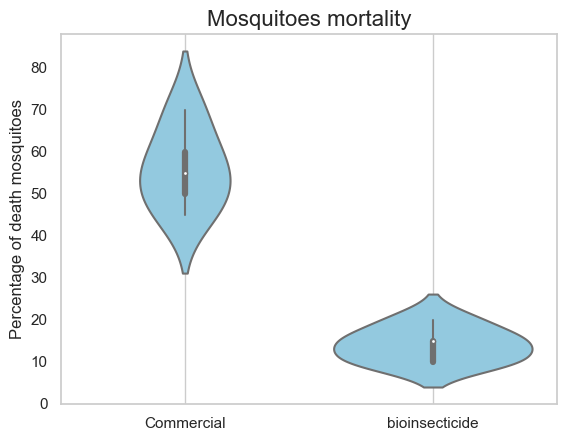

In [20]:
sns.violinplot(data=PDM,size=10,color = "skyblue")
plt.ylabel('Percentage of death mosquitoes', size= 12)
plt.title('Mosquitoes mortality',size= 16)
plt.grid()

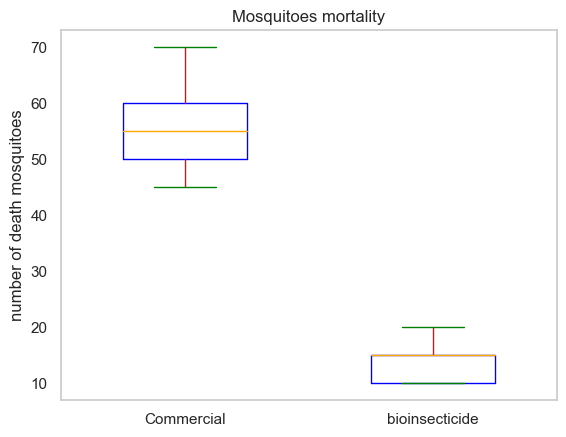

In [21]:
PDM.boxplot( boxprops=dict(color='blue'), widths=(0.5,0.5),whiskerprops=dict(color='red'), 
            capprops=dict(color='green'), medianprops=dict(color='orange'), 
            flierprops=dict(markerfacecolor='red',marker='o'))
plt. title('Mosquitoes mortality')
plt. ylabel('number of death mosquitoes')
plt.grid()

In [22]:
lm=ols('bioinsecticide~Commercial', data=PDM).fit()
table=sm.stats.anova_lm(lm)
print(table)

             df     sum_sq    mean_sq        F    PR(>F)
Commercial  1.0   5.472973   5.472973  0.25445  0.648677
Residual    3.0  64.527027  21.509009      NaN       NaN


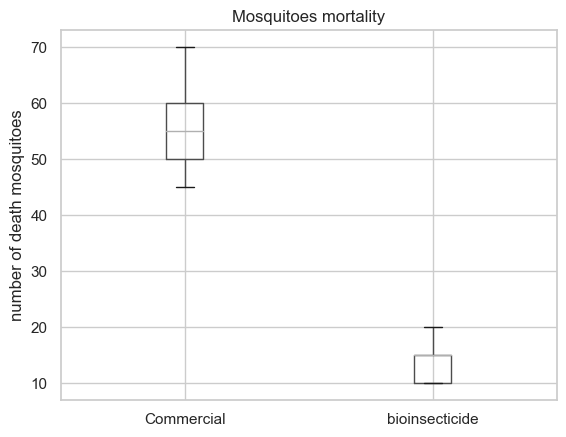

In [23]:
PDM.boxplot()
plt. title('Mosquitoes mortality')
plt. ylabel('number of death mosquitoes');

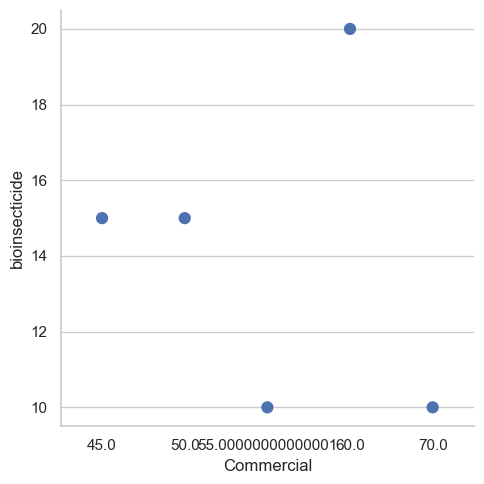

In [24]:
## On peut visualiser cette différence de moyenne en faisant :
sns.catplot(x = 'Commercial', y = 'bioinsecticide', data = PDM, kind = "point", join= False)

## Shapiro statistic

In [25]:
scipy.stats.shapiro(PDM)

ShapiroResult(statistic=0.8643187284469604, pvalue=0.08578033745288849)

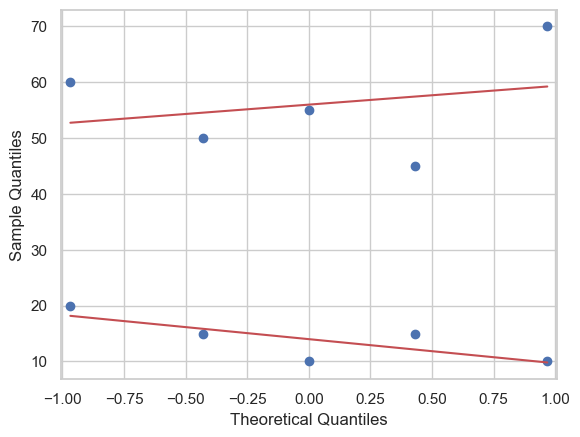

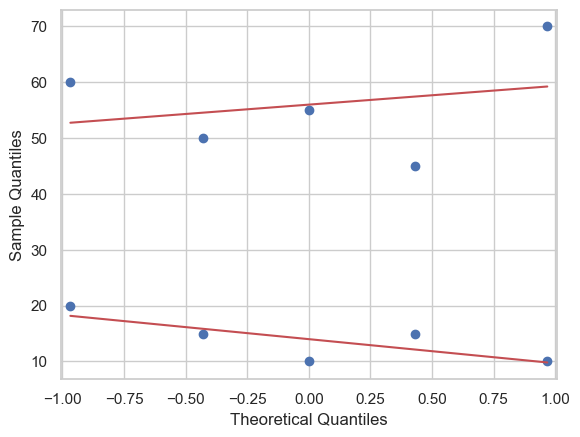

In [26]:
sm.qqplot(PDM, line = "r")

<Axes: >

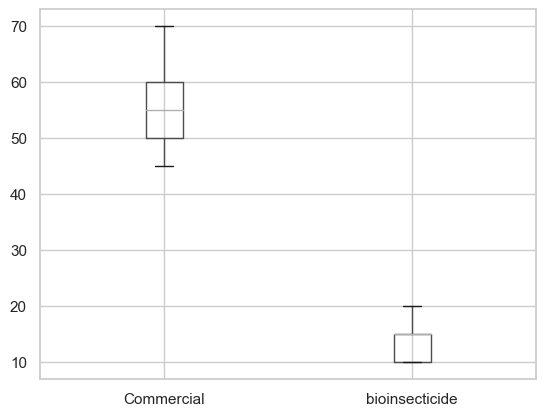

In [27]:
PDM.boxplot()

In [28]:
scipy.stats.shapiro(PDM)

ShapiroResult(statistic=0.8643187284469604, pvalue=0.08578033745288849)